In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/employee.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [67]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [68]:
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

In [69]:
pd.set_option('display.max_columns', None)
df.drop(columns='sales', inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


<Axes: >

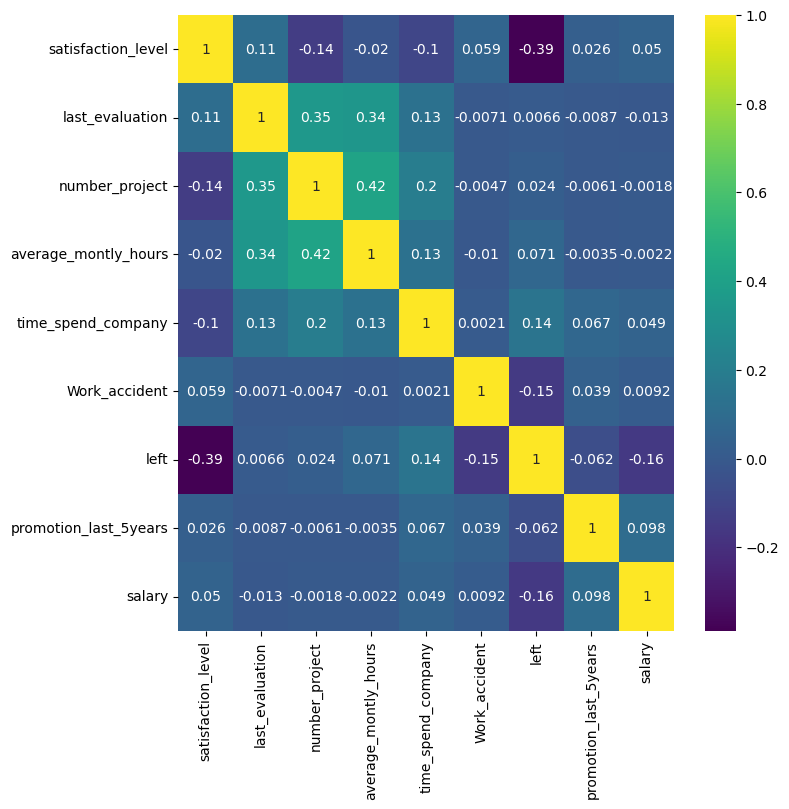

In [70]:
corr = df.corr(numeric_only=True)
plt.subplots(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='viridis')

### Correlations with employees that left
* satisfaction_level = -0.39
* time_spend_company = 0.14
* Work_accident = -0.15
* salary = -0.16


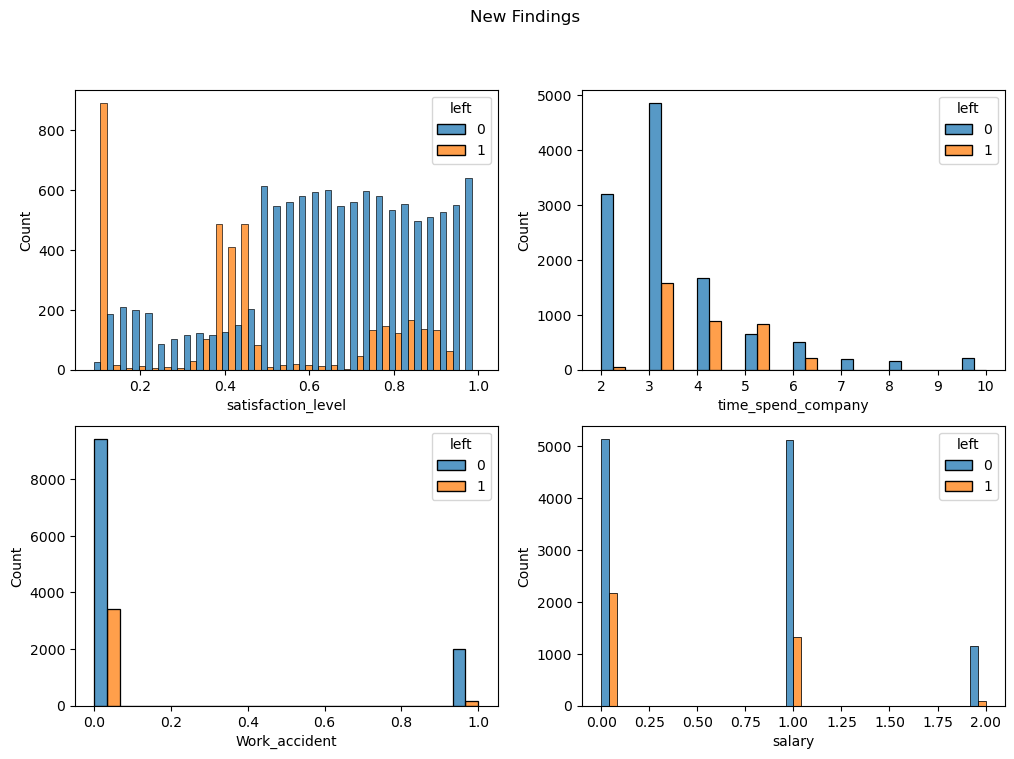

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12, 8))
sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='dodge', ax=axs[0,0])
sns.histplot(data=df, x='time_spend_company', hue='left', multiple='dodge', binwidth=0.5, ax=axs[0,1])
sns.histplot(data=df, x='Work_accident', hue='left', multiple='dodge', ax=axs[1,0])
sns.histplot(data=df, x='salary', hue='left', multiple='dodge', ax=axs[1,1])
plt.suptitle('New Findings');